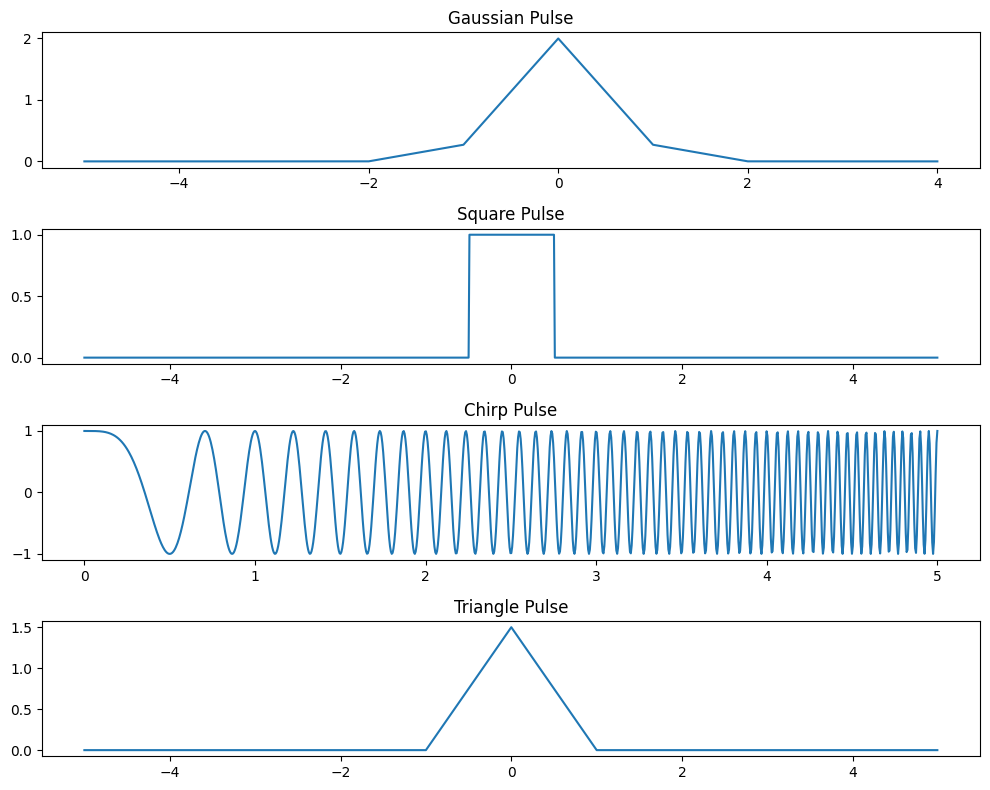

In [77]:
import numpy as np

class EPR_pulse:
    def __init__(self):
        # You can initialize default parameters here if desired.
        pass

    def Gaussian(self, amplitude=100, t0=0.0, sigma=1.0, t_min=-5.0, t_max=5.0, dt=1):
        """
        Generate a Gaussian pulse.
        
        Parameters:
            amplitude : float(mV) The peak amplitude of the pulse.
            t0 : float The center of the Gaussian.
            sigma : float The standard deviation of the Gaussian.
            t_min : float
                Start time of the time axis.
            t_max : float
                End time of the time axis.
            dt : float
                Time resolution (step size).
                
        Returns:
            t : numpy.ndarray
                The time axis.
            y : numpy.ndarray
                The Gaussian pulse amplitudes.
        """
        t = np.arange(t_min, t_max, dt)
        y = amplitude * np.exp(-((t - t0) ** 2) / (2 * sigma ** 2))
        return t, y

    def Square(self, amplitude=1.0, t_start=-1.0, t_end=1.0, t_min=-5.0, t_max=5.0, dt=0.01):
        """
        Generate a square pulse.
        
        Parameters:
            amplitude : float
                The amplitude of the pulse.
            t_start : float
                The start time for the pulse being "on".
            t_end : float
                The end time for the pulse being "on".
            t_min : float
                Start time of the time axis.
            t_max : float
                End time of the time axis.
            dt : float
                Time resolution.
                
        Returns:
            t : numpy.ndarray
                The time axis.
            y : numpy.ndarray
                The square pulse amplitudes.
        """
        t = np.arange(t_min, t_max, dt)
        y = np.zeros_like(t)
        y[(t >= t_start) & (t <= t_end)] = amplitude
        return t, y

    def Chirp(self, amplitude=1.0, f0=0.0, f1=10.0, t_min=0.0, t_max=5.0, points=1000):
        """
        Generate a linear chirp pulse.
        
        The instantaneous frequency increases linearly from f0 to f1 over the time span.
        
        Parameters:
            amplitude : float
                The amplitude of the pulse.
            f0 : float
                The starting frequency (Hz).
            f1 : float
                The ending frequency (Hz).
            t_min : float
                Start time of the time axis.
            t_max : float
                End time of the time axis.
            dt : float
                Time resolution.
                
        Returns:
            t : numpy.ndarray
                The time axis.
            y : numpy.ndarray
                The chirp pulse amplitudes.
        """
        t = np.linspace(t_min, t_max, points)
        # Linear frequency sweep constant
        k = (f1 - f0) / (t_max - t_min)
        # Instantaneous phase: phi(t) = 2pi*(f0*(t-t_min) + 0.5*k*(t-t_min)^2)
        phase = 2 * np.pi * (f0 * (t - t_min) + 0.5 * k * (t - t_min) ** 2)
        y = amplitude * np.cos(phase)
        return t, y

    def Triangle(self, amplitude=1.0, t_start=-1.0, t_peak=0.0, t_end=1.0, t_min=-5.0, t_max=5.0, dt=0.01):
        """
        Generate a triangle pulse.
        
        The pulse linearly rises from t_start to t_peak, and then falls linearly from t_peak to t_end.
        
        Parameters:
            amplitude : float
                The peak amplitude of the pulse.
            t_start : float
                The start time of the pulse.
            t_peak : float
                The time at which the pulse reaches its maximum amplitude.
            t_end : float
                The end time of the pulse.
            t_min : float
                Start time of the time axis.
            t_max : float
                End time of the time axis.
            dt : float
                Time resolution.
                
        Returns:
            t : numpy.ndarray
                The time axis.
            y : numpy.ndarray
                The triangle pulse amplitudes.
        """
        t = np.arange(t_min, t_max, dt)
        y = np.zeros_like(t)
        # Rising edge: from t_start to t_peak
        idx_rise = (t >= t_start) & (t <= t_peak)
        y[idx_rise] = amplitude * (t[idx_rise] - t_start) / (t_peak - t_start)
        # Falling edge: from t_peak to t_end
        idx_fall = (t > t_peak) & (t <= t_end)
        y[idx_fall] = amplitude * (t_end - t[idx_fall]) / (t_end - t_peak)
        return t, y

# Example usage:
if __name__ == '__main__':
    p = EPR_pulse()
    
    # Gaussian pulse example
    t_gauss, y_gauss = p.Gaussian(amplitude=2.0, t0=0.0, sigma=0.5)
    
    # Square pulse example
    t_square, y_square = p.Square(amplitude=1.0, t_start=-0.5, t_end=0.5)
    
    # Chirp pulse example
    t_chirp, y_chirp = p.Chirp(amplitude=1.0, f0=0.0, f1=20.0)
    
    # Triangle pulse example
    t_tri, y_tri = p.Triangle(amplitude=1.5, t_start=-1.0, t_peak=0.0, t_end=1.0)
    
    # You can plot the pulses using matplotlib (optional)
    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 8))
    
    plt.subplot(4, 1, 1)
    plt.plot(t_gauss, y_gauss)
    plt.title("Gaussian Pulse")
    
    plt.subplot(4, 1, 2)
    plt.plot(t_square, y_square)
    plt.title("Square Pulse")
    
    plt.subplot(4, 1, 3)
    plt.plot(t_chirp, y_chirp)
    plt.title("Chirp Pulse")
    
    plt.subplot(4, 1, 4)
    plt.plot(t_tri, y_tri)
    plt.title("Triangle Pulse")
    
    plt.tight_layout()
    plt.show()

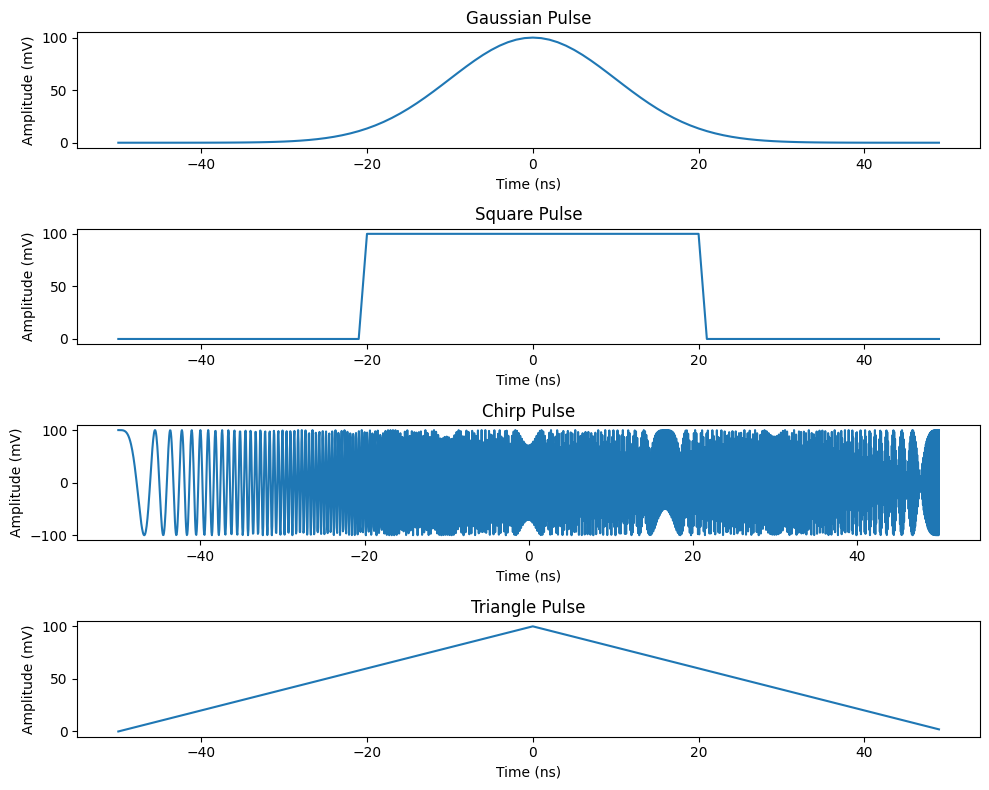

In [78]:

class EPR_pulse:
    def __init__(self):
        # No global defaults; each method sets its own defaults with explicit units:
        # Time in ns and amplitude in mV.
        pass

    def Gaussian(self, amplitude=100, sigma=10, t_min=-50, t_max=50, dt=1):
        """
        Generate a Gaussian pulse.
        
        Parameters:
            amplitude : float
                Peak amplitude in mV (default 100 mV).
            t0 : float
                Center of the Gaussian in ns (default 0 ns).
            sigma : float
                Standard deviation in ns (default 10 ns).
            t_min : float
                Start time of the axis in ns (default -50 ns).
            t_max : float
                End time of the axis in ns (default 50 ns).
            dt : float
                Time resolution in ns (default 1 ns).
                
        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Amplitude values in mV.
        """
        t0 =  (t_max +t_min) / 2

        t = np.arange(t_min, t_max, dt)
        y = amplitude * np.exp(-((t - t0) ** 2) / (2 * sigma ** 2))
        return t, y

    def Square(self, amplitude=100, t_start=-20, t_end=20, t_min=-50, t_max=50, dt=1):
        """
        Generate a square pulse.
        
        Parameters:
            amplitude : float
                Amplitude in mV (default 100 mV).
            t_start : float
                Time (ns) when the pulse turns on (default -20 ns).
            t_end : float
                Time (ns) when the pulse turns off (default 20 ns).
            t_min : float
                Start time of the axis in ns (default -50 ns).
            t_max : float
                End time of the axis in ns (default 50 ns).
            dt : float
                Time resolution in ns (default 1 ns).
                
        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Amplitude values in mV.
        """
        t = np.arange(t_min, t_max, dt)
        y = np.zeros_like(t)
        y[(t >= t_start) & (t <= t_end)] = amplitude
        return t, y

    def Chirp(self, amplitude=100, f0=0, f1=10, t_min=-50, t_max=50, points =2000):
        """
        Generate a linear chirp pulse.
        
        The instantaneous frequency increases linearly from f0 to f1 over the pulse.
        Here, frequency parameters are in GHz and time is in ns; note that 1 ns * 1 GHz = 1,
        so the phase calculation remains dimensionless.
        
        Parameters:
            amplitude : float
                Amplitude in mV (default 100 mV).
            f0 : float
                Starting frequency in GHz (default 1 GHz).
            f1 : float
                Ending frequency in GHz (default 5 GHz).
            t_min : float
                Start time of the axis in ns (default -50 ns).
            t_max : float
                End time of the axis in ns (default 50 ns).
            dt : float
                Time resolution in ns (default 1 ns).
                
        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Amplitude values in mV.
        """
        t = np.linspace(t_min, t_max, points)
        # Linear frequency sweep constant
        k = (f1 - f0) / (t_max - t_min)
        # Instantaneous phase: phi(t) = 2pi*(f0*(t-t_min) + 0.5*k*(t-t_min)^2)
        phase = 2 * np.pi * (f0 * (t - t_min) + 0.5 * k * (t - t_min) ** 2)
        y = amplitude * np.cos(phase)
        return t, y


    def Triangle(self, amplitude=100, t_start=-50, t_peak=0, t_end=50, t_min=-50, t_max=50, dt =1):
        """
        Generate a triangle pulse.
        
        The pulse rises linearly from t_start to t_peak and falls linearly from t_peak to t_end.
        
        Parameters:
            amplitude : float
                Peak amplitude in mV (default 100 mV).
            t_start : float
                Start time in ns (default -50 ns).
            t_peak : float
                Time at which the peak amplitude is reached in ns (default 0 ns).
            t_end : float
                End time in ns (default 50 ns).
            t_min : float
                Start time of the axis in ns (default -50 ns).
            t_max : float
                End time of the axis in ns (default 50 ns).
            dt : float
                Time resolution in ns (default 1 ns).
                
        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Amplitude values in mV.
        """
        t = np.arange(t_min, t_max, dt)
        y = np.zeros_like(t)
        # Rising edge
        idx_rise = (t >= t_start) & (t <= t_peak)
        y[idx_rise] = amplitude * (t[idx_rise] - t_start) / (t_peak - t_start)
        # Falling edge
        idx_fall = (t > t_peak) & (t <= t_end)
        y[idx_fall] = amplitude * (t_end - t[idx_fall]) / (t_end - t_peak)
        return t, y

# Example usage:
if __name__ == '__main__':
    p = EPR_pulse()
    
    # Generate pulses with default parameters (units in ns and mV)
    t_gauss, y_gauss = p.Gaussian()
    t_square, y_square = p.Square()
    t_chirp, y_chirp = p.Chirp()
    t_tri, y_tri = p.Triangle()
    
    # Plot the pulses using matplotlib
    plt.figure(figsize=(10, 8))
    
    plt.subplot(4, 1, 1)
    plt.plot(t_gauss, y_gauss)
    plt.title("Gaussian Pulse")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    
    plt.subplot(4, 1, 2)
    plt.plot(t_square, y_square)
    plt.title("Square Pulse")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    
    plt.subplot(4, 1, 3)
    plt.plot(t_chirp, y_chirp)
    plt.title("Chirp Pulse")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    
    plt.subplot(4, 1, 4)
    plt.plot(t_tri, y_tri)
    plt.title("Triangle Pulse")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    
    plt.tight_layout()
    plt.show()

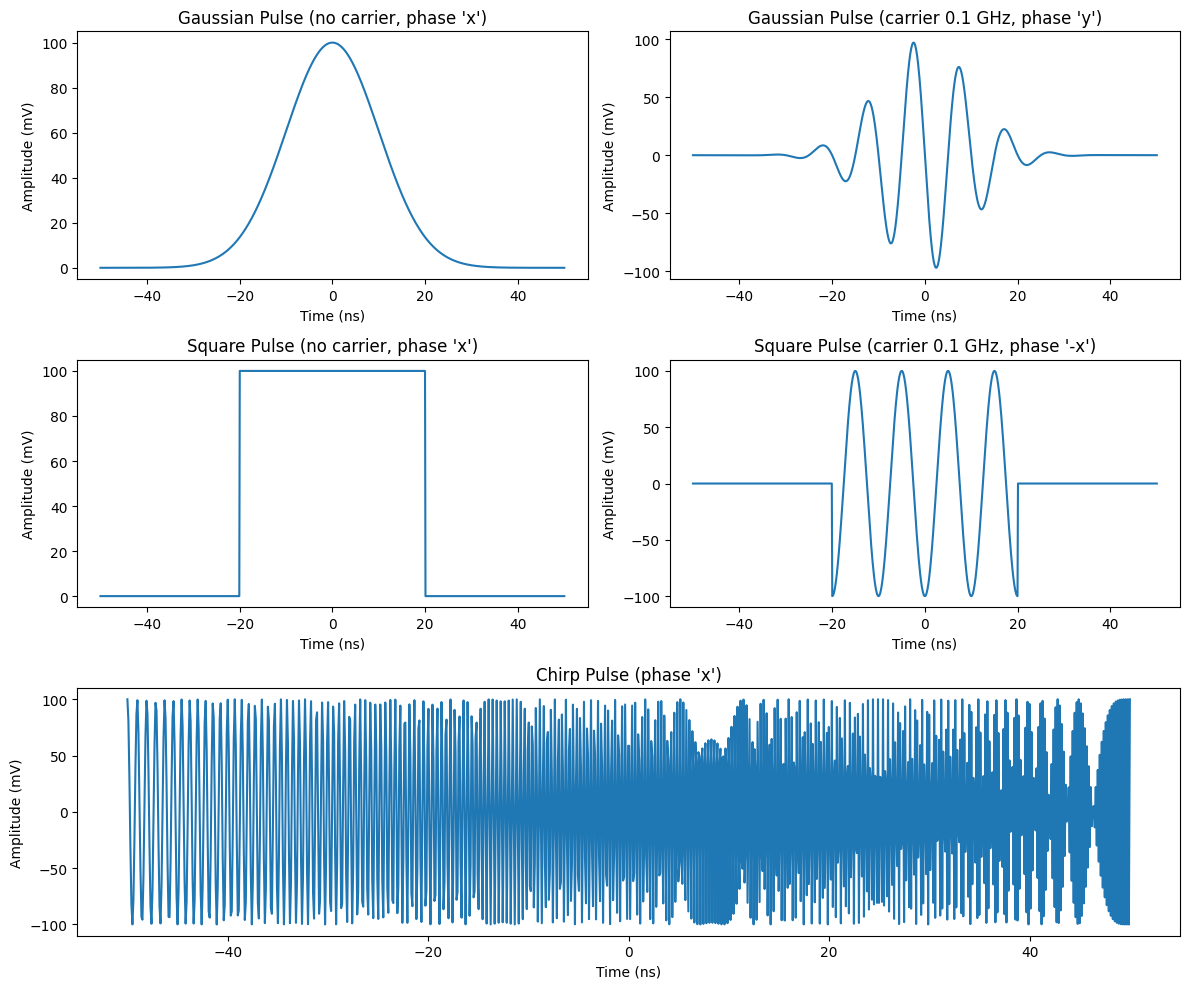

In [79]:
import numpy as np
import matplotlib.pyplot as plt

class EPR_pulse:
    def __init__(self):
        pass

    @staticmethod
    def _parse_phase(phase):
        """
        Convert the phase parameter into radians.
        If a string is provided, it is mapped as follows:
            'x'  -> 0°,
            'y'  -> 90°,
            '-x' -> 180°,
            '-y' -> 270°.
        Otherwise, a numeric value (in degrees) is assumed.
        """
        if isinstance(phase, str):
            mapping = {'x': 0, 'y': 90, '-x': 180, '-y': 270}
            return np.deg2rad(mapping.get(phase, 0))
        else:
            return np.deg2rad(phase)

    def Gaussian(self, amplitude=100, t0=0, sigma=10,
                 t_min=-50, t_max=50, points=1000, phase='x', f_c=0):
        """
        Generate a Gaussian pulse.

        Parameters:
            amplitude : float
                Peak amplitude in mV (default 100 mV).
            t0 : float
                Center of the Gaussian in ns (default 0 ns).
            sigma : float
                Standard deviation in ns (default 10 ns).
            t_min, t_max : float
                Time range in ns (default -50 to 50 ns).
            points : int
                Number of points in the time axis (default 1000).
            phase : str or float
                Phase specification: 'x' (0°), 'y' (90°), '-x' (180°),
                '-y' (270°), or a numeric phase in degrees.
            f_c : float
                Carrier frequency in GHz. If nonzero, the pulse is modulated by
                cos(2π f_c t + phase). If 0 (default), the envelope is multiplied
                by cos(phase) (a constant).

        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Pulse amplitude in mV.
        """
        t = np.linspace(t_min, t_max, points)
        envelope = amplitude * np.exp(-((t - t0) ** 2) / (2 * sigma ** 2))
        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            # Modulate the envelope with a cosine carrier at f_c (in GHz)
            y = envelope * np.cos(2 * np.pi * f_c * t + phase_offset)
        else:
            # No carrier frequency; apply a constant phase factor
            y = envelope * np.cos(phase_offset)
        return t, y

    def Square(self, amplitude=100, t_start=-20, t_end=20,
               t_min=-50, t_max=50, points=1000, phase='x', f_c=0):
        """
        Generate a square pulse.

        Parameters:
            amplitude : float
                Amplitude in mV (default 100 mV).
            t_start, t_end : float
                Time (ns) when the pulse is "on" (default -20 ns to 20 ns).
            t_min, t_max : float
                Time range in ns (default -50 to 50 ns).
            points : int
                Number of points in the time axis (default 1000).
            phase : str or float
                Phase specification (see Gaussian).
            f_c : float
                Carrier frequency in GHz for modulation. If 0 (default), the envelope is
                multiplied by cos(phase).

        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Pulse amplitude in mV.
        """
        t = np.linspace(t_min, t_max, points)
        envelope = np.zeros_like(t)
        envelope[(t >= t_start) & (t <= t_end)] = amplitude
        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.cos(2 * np.pi * f_c * t + phase_offset)
        else:
            y = envelope * np.cos(phase_offset)
        return t, y

    def Chirp(self, amplitude=100, f0=1, f1=5,
              t_min=-50, t_max=50, points=1000, phase='x'):
        """
        Generate a linear chirp pulse.

        The instantaneous frequency increases linearly from f0 to f1 (in GHz)
        over the pulse duration. Time is in ns and the phase offset is added.

        Parameters:
            amplitude : float
                Amplitude in mV (default 100 mV).
            f0 : float
                Starting frequency in GHz (default 1 GHz).
            f1 : float
                Ending frequency in GHz (default 5 GHz).
            t_min, t_max : float
                Time range in ns (default -50 to 50 ns).
            points : int
                Number of points in the time axis (default 1000).
            phase : str or float
                Phase specification (see Gaussian).

        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Pulse amplitude in mV.
        """
        t = np.linspace(t_min, t_max, points)
        k = (f1 - f0) / (t_max - t_min)
        base_phase = 2 * np.pi * (f0 * (t - t_min) + 0.5 * k * (t - t_min) ** 2)
        phase_offset = self._parse_phase(phase)
        total_phase = base_phase + phase_offset
        y = amplitude * np.cos(total_phase)
        return t, y

# Example usage:
if __name__ == '__main__':
    p = EPR_pulse()
    
    # Generate pulses with default parameters:
    t_gauss, y_gauss = p.Gaussian()  # No carrier modulation; phase 'x' → envelope * cos(0) = envelope.
    t_square, y_square = p.Square()   # Similarly, phase 'x' gives the full amplitude.
    t_chirp, y_chirp = p.Chirp()       # Chirp pulse with default phase 'x'
    
    # Examples with carrier frequency modulation:
    t_gauss_mod, y_gauss_mod = p.Gaussian(f_c=0.1, phase='y')   # Gaussian with 0.1 GHz carrier, phase 'y' (90°)
    t_square_mod, y_square_mod = p.Square(f_c=0.1, phase='-x')    # Square with 0.1 GHz carrier, phase '-x' (180°)
    
    # Plot the pulses
    plt.figure(figsize=(12, 10))
    
    plt.subplot(3, 2, 1)
    plt.plot(t_gauss, y_gauss)
    plt.title("Gaussian Pulse (no carrier, phase 'x')")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    
    plt.subplot(3, 2, 2)
    plt.plot(t_gauss_mod, y_gauss_mod)
    plt.title("Gaussian Pulse (carrier 0.1 GHz, phase 'y')")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    
    plt.subplot(3, 2, 3)
    plt.plot(t_square, y_square)
    plt.title("Square Pulse (no carrier, phase 'x')")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    
    plt.subplot(3, 2, 4)
    plt.plot(t_square_mod, y_square_mod)
    plt.title("Square Pulse (carrier 0.1 GHz, phase '-x')")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    
    plt.subplot(3, 1, 3)
    plt.plot(t_chirp, y_chirp)
    plt.title("Chirp Pulse (phase 'x')")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    
    plt.tight_layout()
    plt.show()

<>:27: SyntaxWarning: invalid escape sequence '\('
<>:66: SyntaxWarning: invalid escape sequence '\('
<>:27: SyntaxWarning: invalid escape sequence '\('
<>:66: SyntaxWarning: invalid escape sequence '\('
/var/folders/tv/w_x5m8vd4v99q5__j6jwf4nc0000gn/T/ipykernel_81429/4209879868.py:27: SyntaxWarning: invalid escape sequence '\('
  """
/var/folders/tv/w_x5m8vd4v99q5__j6jwf4nc0000gn/T/ipykernel_81429/4209879868.py:66: SyntaxWarning: invalid escape sequence '\('
  """


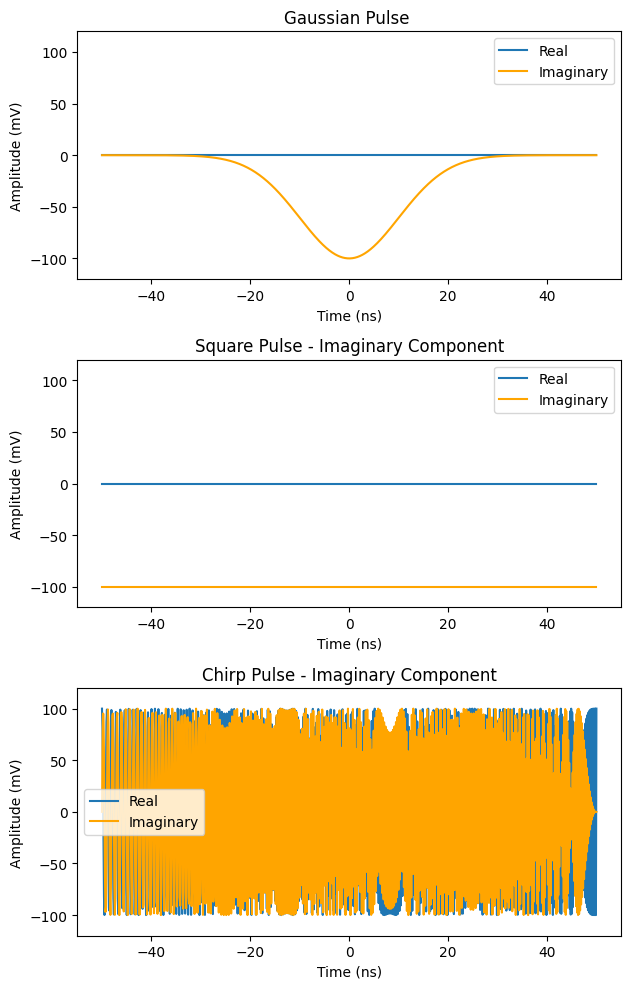

In [80]:
import numpy as np
import matplotlib.pyplot as plt

class EPR_pulse:
    def __init__(self):
        pass

    @staticmethod
    def _parse_phase(phase):
        """
        Convert the phase parameter into radians.
        If a string is provided, map:
            'x'  -> 0°,
            'y'  -> 90°,
            '-x' -> 180°,
            '-y' -> 270°.
        Otherwise, assume a numeric phase (in degrees).
        """
        if isinstance(phase, str):
            mapping = {'x': 0, 'y': 90, '-x': 180, '-y': 270}
            return np.deg2rad(mapping.get(phase, 0))
        else:
            return np.deg2rad(phase)

    def Gaussian(self, amplitude=100, sigma=10, 
                 t_min=-50, t_max=50, points=1000, phase='x', f_c=0):
        """
        Generate a Gaussian pulse.
        
        Parameters:
            amplitude : float
                Peak amplitude in mV (default 100 mV).
            sigma : float
                Standard deviation in ns (default 10 ns).
            t_min, t_max : float
                Time range in ns (default -50 to 50 ns).
            points : int
                Number of points in the time axis (default 1000).
            phase : str or float
                Phase specification: 'x' (0°), 'y' (90°), '-x' (180°), '-y' (270°),
                or a numeric phase shift in degrees.
            f_c : float
                Carrier frequency in GHz. If nonzero, the pulse is modulated by 
                \(e^{i(2\pi f_c t + \text{phase})}\); if zero, the envelope is multiplied by \(e^{i\text{phase}}\).
        
        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Complex pulse amplitude in mV.
        """
        # Calculate the center of the Gaussian
        t0 = (t_max + t_min) / 2
        t = np.linspace(t_min, t_max, points)
        envelope = amplitude * np.exp(-((t - t0)**2) / (2 * sigma**2))
        phase_offset = self._parse_phase(phase)
        # Modulate the envelope with a carrier frequency if specified
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope * np.exp(1j * phase_offset)
        return t, y

    def Square(self, amplitude=100, duty_cycle=1,
               t_min=-50, t_max=50, points=1000, phase='x', f_c=0):
        """
        Generate a square pulse.
        
        Parameters:
            amplitude : float
                Amplitude in mV (default 100 mV).
            t_start, t_end : float
                Times (in ns) between which the pulse is "on" (default -20 ns to 20 ns).
            t_min, t_max : float
                Time range in ns (default -50 to 50 ns).
            points : int
                Number of points in the time axis (default 1000).
            phase : str or float
                Phase specification (see Gaussian).
            f_c : float
                Carrier frequency in GHz for modulation. If nonzero, the pulse is modulated by 
                \(e^{i(2\pi f_c t + \text{phase})}\); if zero, the envelope is multiplied by \(e^{i\text{phase}}\).
        
        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Complex pulse amplitude in mV.
        """
        t = np.linspace(t_min, t_max, points)
        pulse_length = (t_max - t_min)*duty_cycle
        envelope = np.zeros_like(t)
        if duty_cycle > 0:
            envelope[(t >= t_min) & (t <= t_min+pulse_length)] = amplitude

        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope * np.exp(1j * phase_offset)
        return t, y

    def Chirp(self, amplitude=100, f0=1, f1=5, 
              t_min=-50, t_max=50, points=1000, phase='x'):
        """
        Generate a linear chirp pulse.
        
        The instantaneous frequency increases linearly from f0 to f1 (in GHz) over the pulse duration.
        The phase shift is applied by adding the parsed phase offset.
        
        Parameters:
            amplitude : float
                Amplitude in mV (default 100 mV).
            f0 : float
                Starting frequency in GHz (default 1 GHz).
            f1 : float
                Ending frequency in GHz (default 5 GHz).
            t_min, t_max : float
                Time range in ns (default -50 to 50 ns).
            points : int
                Number of points in the time axis (default 1000).
            phase : str or float
                Phase specification (see Gaussian).
        
        Returns:
            t : numpy.ndarray
                Time axis in ns.
            y : numpy.ndarray
                Complex pulse amplitude in mV.
        """
        t = np.linspace(t_min, t_max, points)
        k = (f1 - f0) / (t_max - t_min)
        base_phase = 2 * np.pi * (f0 * (t - t_min) + 0.5 * k * (t - t_min)**2)
        phase_offset = self._parse_phase(phase)
        total_phase = base_phase + phase_offset
        y = amplitude * np.exp(1j * total_phase)
        return t, y

# Example usage:
if __name__ == '__main__':
    p = EPR_pulse()
    
    # Generate a Gaussian pulse with phase '-x' (180° -> multiplies by -1) 
    # and a square pulse with phase 'y' (90° -> multiplies by i)
    t_gauss, y_gauss = p.Gaussian(phase=270)
    t_square, y_square = p.Square(phase='-y')
    t_chirp, y_chirp = p.Chirp(phase='x')
    
    # Plot real and imaginary parts for the Gaussian pulse
    plt.figure(figsize=(12, 10))
    
    plt.subplot(3, 2, 1)
    plt.plot(t_gauss, np.real(y_gauss), label='Real')
    plt.plot(t_gauss, np.imag(y_gauss), color='orange', label='Imaginary')
    plt.title("Gaussian Pulse ")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
    plt.ylim(-120,120)
    
    # Plot real and imaginary parts for the Square pulse
    plt.subplot(3, 2, 3)
    plt.plot(t_square, np.real(y_square), label='Real')
    plt.plot(t_square, np.imag(y_square), color='orange', label='Imaginary')
    plt.title("Square Pulse - Imaginary Component")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
    plt.ylim(-120,120)

    
    # Plot real and imaginary parts for the Chirp pulse
    plt.subplot(3, 2, 5)
    plt.plot(t_chirp, np.real(y_chirp), label='Real')
    plt.plot(t_chirp, np.imag(y_chirp), color='orange', label='Imaginary')
    plt.title("Chirp Pulse - Imaginary Component")
    plt.xlabel("Time (ns)")
    plt.ylabel("Amplitude (mV)")
    plt.legend()
    plt.ylim(-120,120)

    
    plt.tight_layout()
    plt.show()

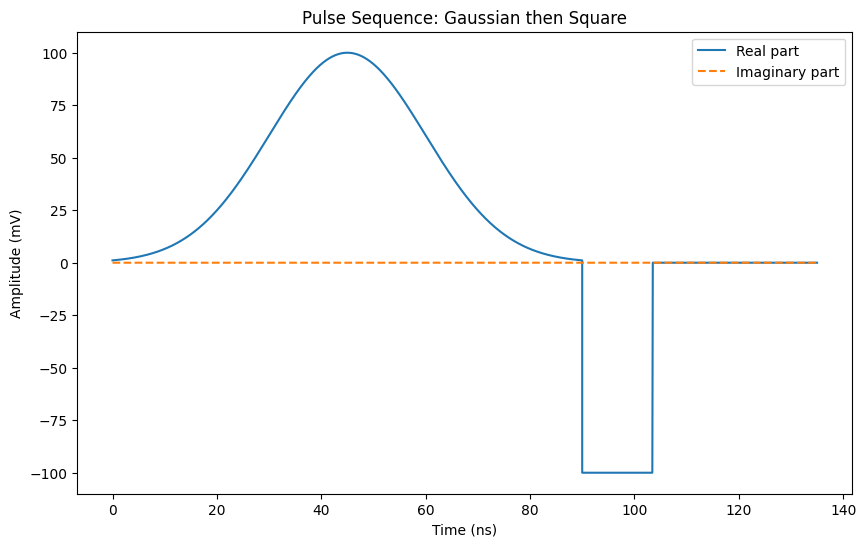

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# --- Paste the EPR_pulse class definition from the previous version here ---
# For brevity, I'll assume it's already defined as in the previous code block.

# (The EPR_pulse class from before with methods Gaussian, Square, Chirp is assumed here.)

# Create an instance of EPR_pulse
p = EPR_pulse()

# ----------------------------------------
# Generate the Gaussian pulse:
#  - Total duration: 90 ns (t from 0 to 90)
#  - Center at 45 ns, sigma chosen to roughly cover the interval
#  - Amplitude 100 mV, phase 'x' (0°)
# ----------------------------------------
t_gauss, y_gauss = p.Gaussian(
    amplitude=100, 
    sigma=15,     # sigma chosen so the pulse covers most of 0 to 90 ns
    t_min=0, 
    t_max=90, 
    points=1000, 
    phase='x', 
    f_c=0       # no carrier frequency modulation
)

# ----------------------------------------
# Generate the Square pulse:
#  - Total duration: 45 ns (t from 90 to 135)
#  - Pulse "on" from 90 to 135 ns, amplitude 100 mV, phase '-x' (180°)
# ----------------------------------------
t_square, y_square = p.Square(
    amplitude=100, 
    duty_cycle=0.3,
    t_min=90, 
    t_max=135, 
    points=500, 
    phase='-x', 
    f_c=0       # no carrier frequency modulation
)

# ----------------------------------------
# Create a composite pulse sequence by concatenating the two pulses.
# Note: the last time point of the Gaussian (t=90 ns) is repeated as the first of the square.
# ----------------------------------------
t_sequence = np.concatenate([t_gauss, t_square])
y_sequence = np.concatenate([y_gauss, y_square])

# ----------------------------------------
# Plot the composite pulse sequence.
# We'll plot both the real and imaginary parts.
# For these pulses (with f_c=0) the complex modulation is simply a constant phase factor.
# For 'x' (0°) the pulse is purely real, and for '-x' (180°) it is inverted (purely real but negative).
# ----------------------------------------
plt.figure(figsize=(10,6))
plt.plot(t_sequence, np.real(y_sequence), label='Real part')
plt.plot(t_sequence, np.imag(y_sequence), label='Imaginary part', linestyle='--')
plt.xlabel('Time (ns)')
plt.ylabel('Amplitude (mV)')
plt.title('Pulse Sequence: Gaussian then Square')
plt.legend()
plt.show()

2496


<Figure size 640x480 with 0 Axes>

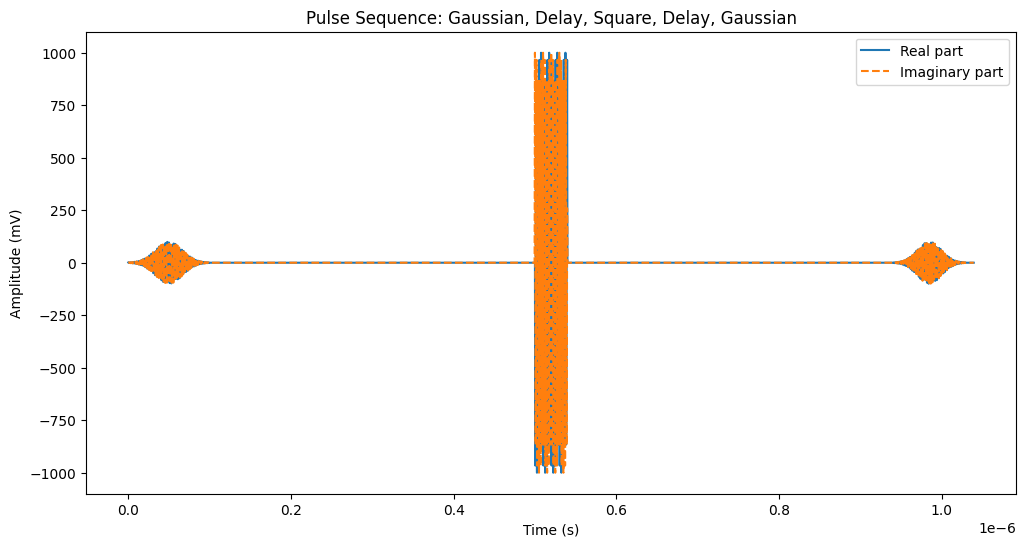

In [82]:
import numpy as np
import matplotlib.pyplot as plt

class EPR_pulse:
    def __init__(self,sampling_rate=2.4e9):
        self.sampling_rate = sampling_rate  # Default sampling rate in Hz

    @staticmethod
    def _parse_phase(phase):
        """
        Convert the phase parameter into radians.
        If a string is provided, map:
            'x'  -> 0°,
            'y'  -> 90°,
            '-x' -> 180°,
            '-y' -> 270°.
        Otherwise, assume a numeric phase (in degrees).
        """
        if isinstance(phase, str):
            mapping = {'x': 0, 'y': 90, '-x': 180, '-y': 270}
            return np.deg2rad(mapping.get(phase, 0))
        else:
            return np.deg2rad(phase)

    def Gaussian(self, amplitude=100, sigma=10, 
                 t_min=-50e-9, t_max=50e-9, phase='x', f_c=500e6):
        """
        Generate a Gaussian pulse.
        Time is in s and amplitude in mV.
        """
        dt = 1 / self.sampling_rate
        t = np.arange(t_min, t_max, dt)

        points = len(t)
        # Ensure the number of points is even for syncing with the digital output channel
        if points%2 != 0:
            t = np.append(t, t[-1] + dt)
        # Calculate the center of the Gaussian
        t0 =  (t_max +t_min) / 2
        envelope = amplitude * np.exp(-((t - t0)**2) / (2 * sigma**2))
        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope *  np.exp(1j * phase_offset)
        return t, y

    # def Square(self, amplitude=100, t_start=-20, t_end=20,
    #            t_min=-50, t_max=50, points=1000, phase='x', f_c=0):
    #     """
    #     Generate a square pulse.
    #     Time is in ns and amplitude in mV.
    #     """
    #     t = np.linspace(t_min, t_max, points)
    #     envelope = np.zeros_like(t)
    #     envelope[(t >= t_start) & (t <= t_end)] = amplitude
    #     phase_offset = self._parse_phase(phase)
    #     if f_c != 0:
    #         y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
    #     else:
    #         y = envelope *  np.exp(1j * phase_offset)
    #     return t, y
    
    def Square(self, amplitude=100, duty_cycle=1,
               t_min=-50e-9, t_max=50e-9, phase='x', f_c=500e6):
        """
        Generate a square pulse.
            t : numpy.ndarray
                Time axis in s.
            y : numpy.ndarray
                Complex pulse amplitude in mV.
        """
        dt = 1 / self.sampling_rate
        t = np.arange(t_min, t_max, dt)
        points = len(t)
        # Ensure the number of points is even for syncing with the digital output channel
        if points%2 != 0:
            t = np.append(t, t[-1] + dt)

        pulse_length = (t_max - t_min)*duty_cycle
        envelope = np.zeros_like(t)
        if duty_cycle > 0:
            envelope[(t >= t_min) & (t <= t_min+pulse_length)] = amplitude

        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope * np.exp(1j * phase_offset)
        return t, y


    def Chirp(self, amplitude=100, f0=1, f1=5, 
              t_min=-50e-9, t_max=50e-9, points=1000, phase='x'):
        """
        Generate a linear chirp pulse.
        Time is in ns and amplitude in mV.
        """
        t = np.linspace(t_min, t_max, points)
        k = (f1 - f0) / (t_max - t_min)
        base_phase = 2 * np.pi * (f0 * (t - t_min) + 0.5 * k * (t - t_min)**2)
        phase_offset = self._parse_phase(phase)
        total_phase = base_phase + phase_offset
        y = amplitude *  np.exp(1j * phase_offset)
        return t, y

    def pulse_sequence(self, steps):
        """
        Build a pulse sequence by concatenating pulses and delays.
        
        Each element in steps is a tuple:
          For pulses: (pulse_type, duration, parameters_dict)
          For a delay: ('delay', duration, optional_parameters_dict)
          
        The time axis for each pulse (or delay) is defined from 0 to duration.
        Pulses are then time-shifted to form one continuous (t, y) sequence.
        
        Returns:
          t_seq : numpy.ndarray
              The overall time axis in ns.
          y_seq : numpy.ndarray
              The overall pulse sequence (complex or real, in mV).
        """
        t_seq = np.array([])
        y_seq = np.array([])
        dt = 1 / self.sampling_rate
        current_time = 0
        
        for step in steps:
            pulse_type = step[0].lower()
            duration = step[1]
            if pulse_type == 'delay':
                # For a delay, generate zeros.
                params = step[2] if len(step) > 2 else {}
                t_local = np.arange(0, duration, dt)
                points = len(t_local)
                y_local = np.zeros(points, dtype=float)
            else:
                # For a pulse, use the corresponding method.
                params = step[2] if len(step) > 2 else {}
                # Set common defaults: define the pulse over 0 to duration.
                if pulse_type == 'gaussian':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    params.setdefault('sigma', duration/6)  # roughly cover duration
                    func = self.Gaussian
                elif pulse_type == 'square':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    func = self.Square
                elif pulse_type == 'chirp':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    func = self.Chirp
                else:
                    raise ValueError(f"Unknown pulse type: {step[0]}")
                t_local, y_local = func(**params)
            # Shift local time by the current cumulative time.
            t_local = t_local + current_time
            t_seq = np.concatenate((t_seq, t_local))
            y_seq = np.concatenate((y_seq, y_local))
            current_time += duration
        
        # Calculate the step size (dt) from t_seq
        dt = np.diff(t_seq)[0]
        # Calculate the number of additional points needed
        remainder = len(t_seq) % 64
        if remainder != 0:
            additional_points = 64 - remainder
        else:
            additional_points = 0
        # Extend t_seq with additional points
        t_seq_extended = np.append(t_seq, t_seq[-1] + dt * np.arange(1, additional_points + 1))
        # Extend y_seq with zeros
        y_seq_extended = np.append(y_seq, np.zeros(additional_points, dtype=y_seq.dtype))
        # Update t_seq and y_seq
        t_seq = t_seq_extended
        y_seq = y_seq_extended


        return t_seq, y_seq

# ------------------------------
# Example usage:
# Build a sequence:
#   1. A Gaussian pulse 90 ns long, amplitude=100 mV, phase 'x'.
#   2. A delay of 1000 ns.
#   3. A square pulse 45 ns long, amplitude=100 mV, phase '-y'.
#   4. A delay of 1000 ns.
#   5. A Gaussian pulse 90 ns long, amplitude=100 mV, phase 30 degree.
# The structure for steps (list of tuples) is:
#  steps = [ (pulse type1, duration, {library of other parameters})
#            (delay, duration, {'points':##}),
#            (pulse type2, duration, {library of other parameters}),
#            (pulse type3, duration, {library of other parameters}),] 
# 
# ------------------------------

if __name__ == '__main__':
    p = EPR_pulse()  # Set a sampling rate of 2.4 GHz
    
    steps = [
        ('Gaussian', 100e-9, {'amplitude': 100 ,'phase': 16, }),
        ('delay', 400e-9),
        ('Square', 40e-9, {'amplitude': 1000, 'phase': 90}),
        ('delay', 400e-9),
        ('Gaussian', 90e-9, {'amplitude': 100, 'phase': 150})
    ]
    
    t_seq, y_seq = p.pulse_sequence(steps)
    
    print (len(t_seq))
    plt.figure(1)
    # Plot the overall sequence: real and imaginary components.
    plt.figure(figsize=(12, 6))
    plt.plot(t_seq, np.real(y_seq), label='Real part')
    plt.plot(t_seq, np.imag(y_seq), label='Imaginary part', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.title('Pulse Sequence: Gaussian, Delay, Square, Delay, Gaussian')
    plt.legend()
    plt.show()

In [83]:
# Calculate the step size (dt) from t_seq
dt = np.diff(t_seq)[0]

# Calculate the number of additional points needed
remainder = len(t_seq) % 64
if remainder != 0:
    additional_points = 64 - remainder
else:
    additional_points = 0

# Extend t_seq with additional points
t_seq_extended = np.append(t_seq, t_seq[-1] + dt * np.arange(1, additional_points + 1))

# Extend y_seq with zeros
y_seq_extended = np.append(y_seq, np.zeros(additional_points, dtype=y_seq.dtype))

# Update t_seq and y_seq
t_seq = t_seq_extended
y_seq = y_seq_extended

# Print the new lengths to verify
print("New length of t_seq:", len(t_seq))
print("New length of y_seq:", len(y_seq))

New length of t_seq: 2496
New length of y_seq: 2496


# V1.3

6208


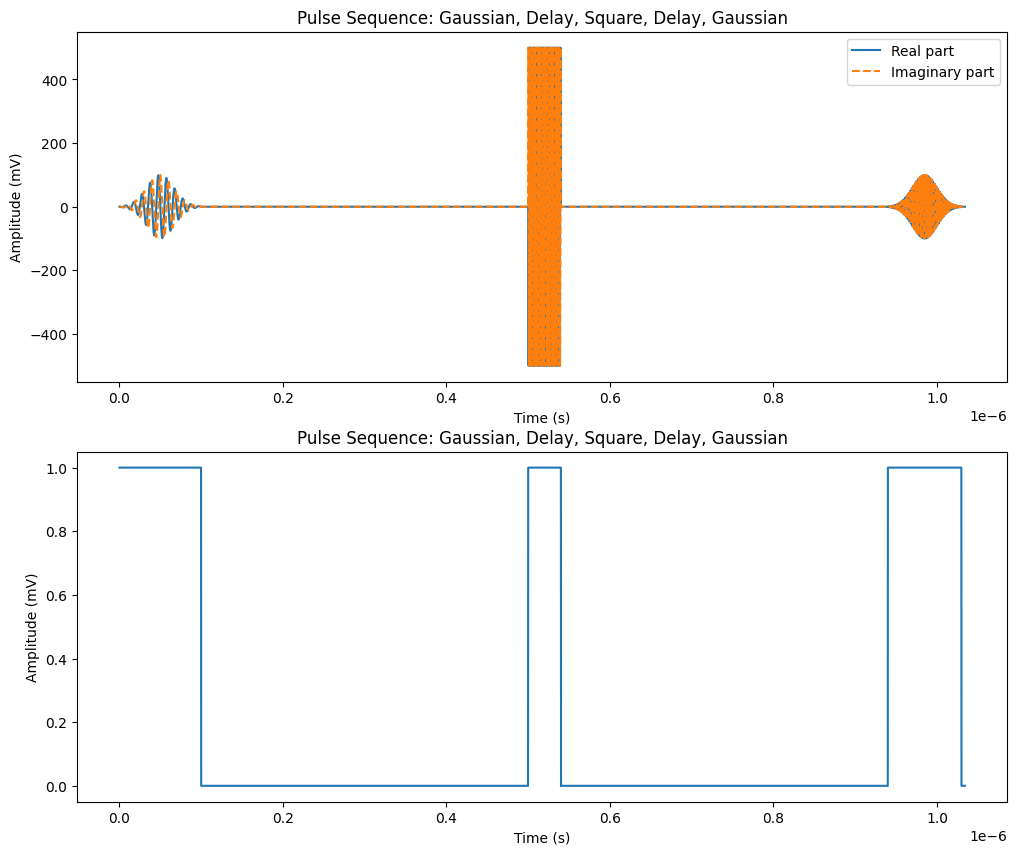

In [12]:
# -*- coding: utf-8 -*-
# author: Hoang Le
import numpy as np
import matplotlib.pyplot as plt

class EPR_pulse:
    def __init__(self,sampling_rate=2.4e9):
        self.sampling_rate = sampling_rate  # Default sampling rate in Hz

    @staticmethod
    def _parse_phase(phase):
        """
        Convert the phase parameter into radians.
        If a string is provided, map:
            'x'  -> 0°,'y'  -> 90°,'-x' -> 180°,'-y' -> 270°.
        Otherwise, assume a numeric phase (in degrees).
        """
        if isinstance(phase, str):
            mapping = {'x': 0, 'y': 90, '-x': 180, '-y': 270}
            return np.deg2rad(mapping.get(phase, 0))
        else:
            return np.deg2rad(phase)

    def Gaussian(self, amplitude=100, sigma=10, 
                 t_min=-50e-9, t_max=50e-9, phase='x', f_c=500e6):
        """
        Generate a Gaussian pulse.
        Time is in s and amplitude in mV. f_c is the carrier frequency in Hz.
        """
        dt = 1 / self.sampling_rate
        t = np.arange(t_min, t_max, dt)

        points = len(t)
        # Ensure the number of points is even for syncing with the digital output channel
        if points%2 != 0:
            t = np.append(t, t[-1] + dt)
        # Calculate the center of the Gaussian
        t0 =  (t_max +t_min) / 2
        envelope = amplitude * np.exp(-((t - t0)**2) / (2 * sigma**2))
        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope *  np.exp(1j * phase_offset)
        return t, y
    
    def Square(self, amplitude=100, duty_cycle=1,
               t_min=-50e-9, t_max=50e-9, phase='x', f_c=500e6):
        """
        Generate a square pulse.
        Time is in s and amplitude in mV.
        """
        dt = 1 / self.sampling_rate
        t = np.arange(t_min, t_max, dt)
        points = len(t)
        # Ensure the number of points is even for syncing with the digital output channel
        if points%2 != 0:
            t = np.append(t, t[-1] + dt)

        pulse_length = (t_max - t_min)*duty_cycle
        envelope = np.zeros_like(t)
        if duty_cycle > 0:
            envelope[(t >= t_min) & (t <= t_min+pulse_length)] = amplitude

        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope * np.exp(1j * phase_offset)
        return t, y


    def Chirp(self, amplitude=100, f0=1, f1=5, 
              t_min=-50e-9, t_max=50e-9, points=1000, phase='x'):
        """
        Generate a linear chirp pulse.
        Time is in ns and amplitude in mV.
        """
        t = np.linspace(t_min, t_max, points)
        k = (f1 - f0) / (t_max - t_min)
        base_phase = 2 * np.pi * (f0 * (t - t_min) + 0.5 * k * (t - t_min)**2)
        phase_offset = self._parse_phase(phase)
        total_phase = base_phase + phase_offset
        y = amplitude *  np.exp(1j * phase_offset)
        return t, y
    
    def must_be_64_multiple (self, t_seq, y_seq):
        dt = np.diff(t_seq)[0]
        # Calculate the number of additional points needed
        remainder = len(t_seq) % 64
        if remainder != 0:
            additional_points = 64 - remainder
        else:
            additional_points = 0
        # Extend t_seq with additional points
        t_seq_extended = np.append(t_seq, t_seq[-1] + dt * np.arange(1, additional_points + 1))
        # Extend y_seq with zeros
        y_seq_extended = np.append(y_seq, np.zeros(additional_points, dtype=y_seq.dtype))
        # Update t_seq and y_seq
        t_seq = t_seq_extended
        y_seq = y_seq_extended
        return t_seq, y_seq

    def pulse_sequence(self, steps):
        """
        Build a pulse sequence by concatenating pulses and delays.
        
        Each element in steps is a tuple:
          For pulses: (pulse_type, duration, parameters_dict)
          For a delay: ('delay', duration, optional_parameters_dict)
          
        The time axis for each pulse (or delay) is defined from 0 to duration.
        Pulses are then time-shifted to form one continuous (t, y) sequence.
        
        Returns:
          t_seq : numpy.ndarray
              The overall time axis in ns.
          y_seq : numpy.ndarray
              The overall pulse sequence (complex or real, in mV).
        """
        t_seq = np.array([])
        y_seq = np.array([])
        dt = 1 / self.sampling_rate
        current_time = 0
        
        for step in steps:
            pulse_type = step[0].lower()
            duration = step[1]
            if pulse_type == 'delay':
                # For a delay, generate zeros.
                params = step[2] if len(step) > 2 else {}
                t_local = np.arange(0, duration, dt)
                points = len(t_local)
                y_local = np.zeros(points, dtype=float)
            else:
                # For a pulse, use the corresponding method.
                params = step[2] if len(step) > 2 else {}
                # Set common defaults: define the pulse over 0 to duration.
                if pulse_type == 'gaussian':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    params.setdefault('sigma', duration/6)  # roughly cover duration
                    func = self.Gaussian
                elif pulse_type == 'square':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    func = self.Square
                elif pulse_type == 'chirp':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    func = self.Chirp
                else:
                    raise ValueError(f"Unknown pulse type: {step[0]}")
                t_local, y_local = func(**params)
            # Shift local time by the current cumulative time.
            t_local = t_local + current_time
            t_seq = np.concatenate((t_seq, t_local))
            y_seq = np.concatenate((y_seq, y_local))
            current_time += duration

        t_seq, y_seq = self.must_be_64_multiple(t_seq, y_seq)

        return t_seq, y_seq
    def dig_output(self, steps, tolerance=1e-12):
        """
        This method uses the pulse_sequence method to get (t, y) and then produces a digital
        representation where y=0 for zero values and y=1 where the pulse is active (nonzero).
        """
        t_seq, y_seq = self.pulse_sequence(steps)
        # Create a digital output: 0 if nearly zero, 1 otherwise.
        dig_y = np.where(np.abs(y_seq) < tolerance, 0, 1)
        return t_seq, dig_y

# ------------------------------
# Example usage:
# Build a sequence:
#   1. A Gaussian pulse 90 ns long, amplitude=100 mV, phase 'x'.
#   2. A delay of 1000 ns.
#   3. A square pulse 45 ns long, amplitude=100 mV, phase '-y'.
#   4. A delay of 1000 ns.
#   5. A Gaussian pulse 90 ns long, amplitude=100 mV, phase 30 degree.
# The structure for steps (list of tuples) is:
#  steps = [ (pulse type1, duration, {library of other parameters})
#            (delay, duration, {'points':##}),
#            (pulse type2, duration, {library of other parameters}),
#            (pulse type3, duration, {library of other parameters}),] 
# 
# ------------------------------

if __name__ == '__main__':
    p = EPR_pulse(6e9)  # Set a sampling rate of 2.4 GHz
    
    steps = [
        ('Gaussian', 100e-9, {'amplitude': 100 ,'phase': 'y','f_c':100e6 }),
        ('delay', 400e-9),
        ('Square', 40e-9, {'amplitude': 500, 'phase': 90}),
        ('delay', 400e-9),
        ('Gaussian', 90e-9, {'amplitude': 100, 'phase': 150})
    ]
    
    t_seq, y_seq = p.pulse_sequence(steps)
    dig_t, dig_y = p.dig_output(steps)
    print (len(t_seq))

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 1, 1)
    # Plot the overall sequence: real and imaginary components.
    plt.plot(t_seq, np.real(y_seq), label='Real part')
    plt.plot(t_seq, np.imag(y_seq), label='Imaginary part', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.title('Pulse Sequence: Gaussian, Delay, Square, Delay, Gaussian')
    plt.legend()

    plt.subplot(2, 1, 2)
    # Plot the overall sequence: real and imaginary components.
    plt.plot(dig_t, dig_y)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.title('Pulse Sequence: Gaussian, Delay, Square, Delay, Gaussian')


    plt.show()

# V1.5

2496


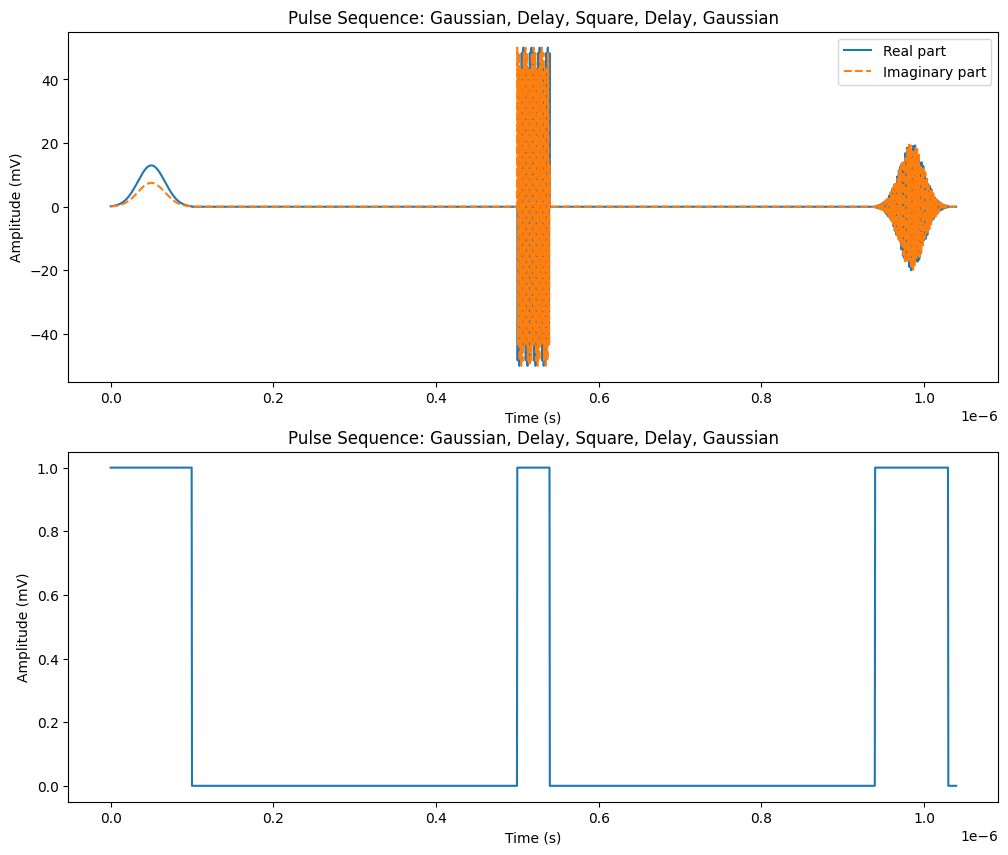

In [31]:
# -*- coding: utf-8 -*-
# author: Hoang Le
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

class EPR_pulse:
    def __init__(self,sampling_rate=2.4e9,Vpp=500):
        self.sampling_rate = sampling_rate  # Default sampling rate in Hz
        self.Vmax = Vpp/2 # Default voltage peak-to-peak in mV
        self.Vpp = Vpp # Default voltage peak-to-peak in mV
    @staticmethod
    def _parse_phase(phase):
        """
        Convert the phase parameter into radians.
        If a string is provided, map:
            'x'  -> 0°,'y'  -> 90°,'-x' -> 180°,'-y' -> 270°.
        Otherwise, assume a numeric phase (in degrees).
        """
        if isinstance(phase, str):
            mapping = {'x': 0, 'y': 90, '-x': 180, '-y': 270}
            return np.deg2rad(mapping.get(phase, 0))
        else:
            return np.deg2rad(phase)

    def Gaussian(self, amplitude=1, sigma=10, 
                 t_min=-50e-9, t_max=50e-9, phase='x', f_c=500e6):
        """
        Generate a Gaussian pulse. Amplitude = Vpp*amplitude
        Time is in s and amplitude in mV. f_c is the carrier frequency in Hz.
        """
        if amplitude > 1:
            raise ValueError("Amplitude must be between 0 and 1.")
        amplitude = self.Vmax * amplitude
        
        dt = 1 / self.sampling_rate
        t = np.arange(t_min, t_max, dt)

        points = len(t)
        # Ensure the number of points is even for syncing with the digital output channel
        if points%2 != 0:
            t = np.append(t, t[-1] + dt)
        # Calculate the center of the Gaussian
        t0 =  (t_max +t_min) / 2
        envelope = amplitude * np.exp(-((t - t0)**2) / (2 * sigma**2))
        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope *  np.exp(1j * phase_offset)
        return t, y
    
    def Square(self, amplitude=1, duty_cycle=1,
               t_min=-50e-9, t_max=50e-9, phase='x', f_c=500e6):
        """
        Generate a square pulse.
        Time is in s and amplitude in mV.
        """
        if amplitude > 1:
            raise ValueError("Amplitude must be between 0 and 1.")
        amplitude = self.Vmax * amplitude
        dt = 1 / self.sampling_rate
        t = np.arange(t_min, t_max, dt)
        points = len(t)
        # Ensure the number of points is even for syncing with the digital output channel
        if points%2 != 0:
            t = np.append(t, t[-1] + dt)

        pulse_length = (t_max - t_min)*duty_cycle
        envelope = np.zeros_like(t)
        if duty_cycle > 0:
            envelope[(t >= t_min) & (t <= t_min+pulse_length)] = amplitude

        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope * np.exp(1j * phase_offset)
        return t, y


    def Chirp(self, amplitude=1, f0=1, f1=5, 
              t_min=-50e-9, t_max=50e-9, points=1000, phase='x'):
        """
        Generate a linear chirp pulse.
        Time is in ns and amplitude in mV.
        """
        t = np.linspace(t_min, t_max, points)
        k = (f1 - f0) / (t_max - t_min)
        base_phase = 2 * np.pi * (f0 * (t - t_min) + 0.5 * k * (t - t_min)**2)
        phase_offset = self._parse_phase(phase)
        total_phase = base_phase + phase_offset
        y = amplitude *  np.exp(1j * phase_offset)
        return t, y
    
    def must_be_64_multiple (self, t_seq, y_seq):
        dt = np.diff(t_seq)[0]
        # Calculate the number of additional points needed
        remainder = len(t_seq) % 64
        if remainder != 0:
            additional_points = 64 - remainder
        else:
            additional_points = 0
        # Extend t_seq with additional points
        t_seq_extended = np.append(t_seq, t_seq[-1] + dt * np.arange(1, additional_points + 1))
        # Extend y_seq with zeros
        y_seq_extended = np.append(y_seq, np.zeros(additional_points, dtype=y_seq.dtype))
        # Update t_seq and y_seq
        t_seq = t_seq_extended
        y_seq = y_seq_extended
        return t_seq, y_seq
    
    def DAC_output(self, y_seq):
        y_dac = (y_seq/self.Vpp +1/2)* (2**16-1)
        return y_dac.astype(np.uint16)
    
    def pulse_sequence(self, steps):
        """
        Build a pulse sequence by concatenating pulses and delays.
        
        Each element in steps is a tuple:
          For pulses: (pulse_type, duration, parameters_dict)
          For a delay: ('delay', duration, optional_parameters_dict)
          
        The time axis for each pulse (or delay) is defined from 0 to duration.
        Pulses are then time-shifted to form one continuous (t, y) sequence.
        
        Returns:
          t_seq : numpy.ndarray
              The overall time axis in ns.
          y_seq : numpy.ndarray
              The overall pulse sequence (complex or real, in mV).
        """
        t_seq = np.array([])
        y_seq = np.array([])
        dt = 1 / self.sampling_rate
        current_time = 0
        
        for step in steps:
            pulse_type = step[0].lower()
            duration = step[1]
            if pulse_type == 'delay':
                # For a delay, generate zeros.
                params = step[2] if len(step) > 2 else {}
                t_local = np.arange(0, duration, dt)
                points = len(t_local)
                y_local = np.zeros(points, dtype=float)
            else:
                # For a pulse, use the corresponding method.
                params = step[2] if len(step) > 2 else {}
                # Set common defaults: define the pulse over 0 to duration.
                if pulse_type == 'gaussian':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    params.setdefault('sigma', duration/6)  # roughly cover duration
                    func = self.Gaussian
                elif pulse_type == 'square':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    func = self.Square
                elif pulse_type == 'chirp':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    func = self.Chirp
                else:
                    raise ValueError(f"Unknown pulse type: {step[0]}")
                t_local, y_local = func(**params)
            # Shift local time by the current cumulative time.
            t_local = t_local + current_time
            t_seq = np.concatenate((t_seq, t_local))
            y_seq = np.concatenate((y_seq, y_local))
            current_time += duration

        t_seq, y_seq = self.must_be_64_multiple(t_seq, y_seq)
        # Convert the y_seq to DAC output format
        # y_dac = self.DAC_output(y_seq)
        return t_seq, y_seq
    
    def dig_output(self, steps, tolerance=1e-12):
        """
        This method uses the pulse_sequence method to get (t, y) and then produces a digital
        representation where y=0 for zero values and y=1 where the pulse is active (nonzero).
        """
        t_seq, y_seq = self.pulse_sequence(steps)
        # Create a digital output: 0 if nearly zero, 1 otherwise.
        dig_y = np.where(np.abs(y_seq) < tolerance, 0, 1)
        return t_seq, dig_y

# ------------------------------
# Example usage:
# Build a sequence:
#   1. A Gaussian pulse 90 ns long, amplitude=100 mV, phase 'x'.
#   2. A delay of 1000 ns.
#   3. A square pulse 45 ns long, amplitude=100 mV, phase '-y'.
#   4. A delay of 1000 ns.
#   5. A Gaussian pulse 90 ns long, amplitude=100 mV, phase 30 degree.
# The structure for steps (list of tuples) is:
#  steps = [ (pulse type1, duration, {library of other parameters})
#            (delay, duration, {'points':##}),
#            (pulse type2, duration, {library of other parameters}),
#            (pulse type3, duration, {library of other parameters}),] 
# 
# ------------------------------

if __name__ == '__main__':
    p = EPR_pulse(Vpp=100)  
    
    steps = [
        ('Gaussian', 100e-9, {'amplitude': 0.3 ,'phase': 30,'f_c':0 }),
        ('delay', 400e-9),
        ('Square', 40e-9, {'amplitude': 1, 'phase': 90}),
        ('delay', 400e-9),
        ('Gaussian', 90e-9, {'amplitude': 0.4, 'phase': 150})
    ]
    
    t_seq, y_seq = p.pulse_sequence(steps)
    dig_t, dig_y = p.dig_output(steps)
    print (len(t_seq))

    plt.figure(figsize=(12, 10))
    plt.subplot(2, 1, 1)
    # Plot the overall sequence: real and imaginary components.
    plt.plot(t_seq, np.real(y_seq), label='Real part')
    plt.plot(t_seq, np.imag(y_seq), label='Imaginary part', linestyle='--')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.title('Pulse Sequence: Gaussian, Delay, Square, Delay, Gaussian')
    plt.legend()

    plt.subplot(2, 1, 2)
    # Plot the overall sequence: real and imaginary components.
    plt.plot(dig_t, dig_y)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude (mV)')
    plt.title('Pulse Sequence: Gaussian, Delay, Square, Delay, Gaussian')


    plt.show()

# Implement this pulse sequence in Tabor



In [24]:
%matplotlib notebook
import numpy as np
import time
import ipywidgets as widgets
import matplotlib.pyplot as plt
import os
import gc
import sys
srcpath = os.path.realpath('../../SourceFiles')
sys.path.append(srcpath)
#from teproteus import TEProteusAdmin, TEProteusInst
from tevisainst import TEVisaInst
from teproteus import TEProteusAdmin as TepAdmin
from teproteus import TEProteusInst as TepInst

In [ ]:
# Connect to instrument via LAN

inst = None
admin = None

conn_msg_str = ''

def disconnect():
    global inst
    global admin
    if inst is not None:
        try:
            inst.close_instrument()            
        except:
            pass
        inst = None
    if admin is not None:
        try:
            admin.close_inst_admin()
        except:
            pass
        admin = None
    gc.collect()

def connect_to_pxi_slot(slot_id):
    global inst
    global admin
    try:
        disconnect()        
        admin = TEProteusAdmin()
        admin.open_inst_admin()        
        inst = admin.open_instrument(slot_id, reset_hot_flag=True)
    except:
        pass

def connect_to_lan_server(ip_address):
    
    global inst
    try:
        disconnect()
        inst = TEVisaInst(ip_address, port=5025)
    except:
        pass

def connect(ipaddr_or_slotid):
    try:
        disconnect()
        if isinstance(ipaddr_or_slotid, str) and '.' in ipaddr_or_slotid:
            connect_to_lan_server(ipaddr_or_slotid)
        else:
            connect_to_pxi_slot(ipaddr_or_slotid)
    except:
        pass

addr_textbox = widgets.Text(
    value='',
    placeholder='IP Address or Slot Id',
    description='Address:',
    disabled=False
)

output = widgets.Output()

def print_conn_message(msg_str):
    global output
    global conn_msg_str
    with output:
        if len(conn_msg_str) > 0:
            print('\r', end='')
            print(' ' * len(conn_msg_str), end='')
            print('\r', end='')
        conn_msg_str = str(msg_str)
        if len(conn_msg_str) > 0:
            print(conn_msg_str, end='')

def on_button_connect_clicked(b):
    global inst
    global addr_textbox
    print_conn_message('')
    disconnect()
    if addr_textbox is not None:
        conn_str = addr_textbox.value
        if conn_str:
            print_conn_message('Connecting to {0} ..'.format(conn_str))
            connect(conn_str)
            print_conn_message('')
    if inst is not None:
        idn_str = inst.send_scpi_query('*IDN?')
        if idn_str:
            print_conn_message('Connected to: ' + idn_str.strip())
    
def on_button_disconnect_clicked(b):
    print_conn_message('')
    disconnect()

btn_connect = widgets.Button(description="Connect")
btn_disconnect = widgets.Button(description="Disconnect")

btn_connect.on_click(on_button_connect_clicked)
btn_disconnect.on_click(on_button_disconnect_clicked)

display(addr_textbox, btn_connect, btn_disconnect, output)

In [ ]:
# Set the default paranoia-level (0, 1 or 2)
inst.default_paranoia_level = 2 # good for debugging

# Clear error-list and reset the instrument
inst.send_scpi_cmd('*CLS; *RST')

In [ ]:
class EPR_pulse:
    def __init__(self,sampling_rate=2.4e9,Vpp=500):
        self.sampling_rate = sampling_rate  # Default sampling rate in Hz
        self.Vmax = Vpp/2 # Default voltage peak-to-peak in mV
        self.Vpp = Vpp # Default voltage peak-to-peak in mV
    @staticmethod
    def _parse_phase(phase):
        """
        Convert the phase parameter into radians.
        If a string is provided, map:
            'x'  -> 0°,'y'  -> 90°,'-x' -> 180°,'-y' -> 270°.
        Otherwise, assume a numeric phase (in degrees).
        """
        if isinstance(phase, str):
            mapping = {'x': 0, 'y': 90, '-x': 180, '-y': 270}
            return np.deg2rad(mapping.get(phase, 0))
        else:
            return np.deg2rad(phase)

    def Gaussian(self, amplitude=1, sigma=10, 
                 t_min=-50e-9, t_max=50e-9, phase='x', f_c=500e6):
        """
        Generate a Gaussian pulse. Amplitude = Vpp*amplitude
        Time is in s and amplitude in mV. f_c is the carrier frequency in Hz.
        """
        if amplitude > 1:
            raise ValueError("Amplitude must be between 0 and 1.")
        amplitude = self.Vmax * amplitude
        
        dt = 1 / self.sampling_rate
        t = np.arange(t_min, t_max, dt)

        points = len(t)
        # Ensure the number of points is even for syncing with the digital output channel
        if points%2 != 0:
            t = np.append(t, t[-1] + dt)
        # Calculate the center of the Gaussian
        t0 =  (t_max +t_min) / 2
        envelope = amplitude * np.exp(-((t - t0)**2) / (2 * sigma**2))
        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope *  np.exp(1j * phase_offset)
        return t, y
    
    def Square(self, amplitude=1, duty_cycle=1,
               t_min=-50e-9, t_max=50e-9, phase='x', f_c=500e6):
        """
        Generate a square pulse.
        Time is in s and amplitude in mV.
        """
        if amplitude > 1:
            raise ValueError("Amplitude must be between 0 and 1.")
        amplitude = self.Vmax * amplitude
        dt = 1 / self.sampling_rate
        t = np.arange(t_min, t_max, dt)
        points = len(t)
        # Ensure the number of points is even for syncing with the digital output channel
        if points%2 != 0:
            t = np.append(t, t[-1] + dt)

        pulse_length = (t_max - t_min)*duty_cycle
        envelope = np.zeros_like(t)
        if duty_cycle > 0:
            envelope[(t >= t_min) & (t <= t_min+pulse_length)] = amplitude

        phase_offset = self._parse_phase(phase)
        if f_c != 0:
            y = envelope * np.exp(1j * (2 * np.pi * f_c * t + phase_offset))
        else:
            y = envelope * np.exp(1j * phase_offset)
        return t, y


    def Chirp(self, amplitude=1, f0=1, f1=5, 
              t_min=-50e-9, t_max=50e-9, points=1000, phase='x'):
        """
        Generate a linear chirp pulse.
        Time is in ns and amplitude in mV.
        """
        t = np.linspace(t_min, t_max, points)
        k = (f1 - f0) / (t_max - t_min)
        base_phase = 2 * np.pi * (f0 * (t - t_min) + 0.5 * k * (t - t_min)**2)
        phase_offset = self._parse_phase(phase)
        total_phase = base_phase + phase_offset
        y = amplitude *  np.exp(1j * phase_offset)
        return t, y
    
    def must_be_64_multiple (self, t_seq, y_seq):
        dt = np.diff(t_seq)[0]
        # Calculate the number of additional points needed
        remainder = len(t_seq) % 64
        if remainder != 0:
            additional_points = 64 - remainder
        else:
            additional_points = 0
        # Extend t_seq with additional points
        t_seq_extended = np.append(t_seq, t_seq[-1] + dt * np.arange(1, additional_points + 1))
        # Extend y_seq with zeros
        y_seq_extended = np.append(y_seq, np.zeros(additional_points, dtype=y_seq.dtype))
        # Update t_seq and y_seq
        t_seq = t_seq_extended
        y_seq = y_seq_extended
        return t_seq, y_seq
    
    def DAC_output(self, y_seq):
        y_dac = (y_seq/self.Vpp +1/2)* (2**16-1)
        return y_dac.astype(np.complex64)
    
    def pulse_sequence(self, steps):
        """
        Build a pulse sequence by concatenating pulses and delays.
        
        Each element in steps is a tuple:
          For pulses: (pulse_type, duration, parameters_dict)
          For a delay: ('delay', duration, optional_parameters_dict)
          
        The time axis for each pulse (or delay) is defined from 0 to duration.
        Pulses are then time-shifted to form one continuous (t, y) sequence.
        
        Returns:
          t_seq : numpy.ndarray
              The overall time axis in ns.
          y_seq : numpy.ndarray
              The overall pulse sequence (complex or real, in mV).
        """
        t_seq = np.array([])
        y_seq = np.array([])
        dt = 1 / self.sampling_rate
        current_time = 0
        
        for step in steps:
            pulse_type = step[0].lower()
            duration = step[1]
            if pulse_type == 'delay':
                # For a delay, generate zeros.
                params = step[2] if len(step) > 2 else {}
                t_local = np.arange(0, duration, dt)
                points = len(t_local)
                y_local = np.zeros(points, dtype=float)
            else:
                # For a pulse, use the corresponding method.
                params = step[2] if len(step) > 2 else {}
                # Set common defaults: define the pulse over 0 to duration.
                if pulse_type == 'gaussian':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    params.setdefault('sigma', duration/6)  # roughly cover duration
                    func = self.Gaussian
                elif pulse_type == 'square':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    func = self.Square
                elif pulse_type == 'chirp':
                    params.setdefault('t_min', 0)
                    params.setdefault('t_max', duration)
                    func = self.Chirp
                else:
                    raise ValueError(f"Unknown pulse type: {step[0]}")
                t_local, y_local = func(**params)
            # Shift local time by the current cumulative time.
            t_local = t_local + current_time
            t_seq = np.concatenate((t_seq, t_local))
            y_seq = np.concatenate((y_seq, y_local))
            current_time += duration

        t_seq, y_seq = self.must_be_64_multiple(t_seq, y_seq)
        # Convert the y_seq to DAC output format
        y_dac = self.DAC_output(y_seq)
        return t_seq, y_dac
    
    def dig_output(self, steps, tolerance=1e-12):
        """
        This method uses the pulse_sequence method to get (t, y) and then produces a digital
        representation where y=0 for zero values and y=1 where the pulse is active (nonzero).
        """
        t_seq, y_seq = self.pulse_sequence(steps)
        # Create a digital output: 0 if nearly zero, 1 otherwise.
        dig_y = np.where(np.abs(y_seq) < tolerance, 0, 1)
        return t_seq, dig_y

    

In [37]:
p = EPR_pulse(Vpp=100)  

steps = [
    ('Square', 1e-6, {'amplitude': 1 ,'phase': 'x','f_c':10e6}),
    ('delay', 2e-6),
    ('Square', 2e-6, {'amplitude': 1, 'phase': 'x'}),
    ('delay', 1e-6),
]

t_seq, y_seq = p.pulse_sequence(steps)
dig_y = p.DAC_output(y_seq) 

/Users/HoangLe/Library/CloudStorage/OneDrive-NorthwesternUniversity/SONGI Ondrive/research/Cryogenic magnet/Programming/Tabor_AWT/AWT-env/lib/python3.13/site-packages/matplotlib/cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/HoangLe/Library/CloudStorage/OneDrive-NorthwesternUniversity/SONGI Ondrive/research/Cryogenic magnet/Programming/Tabor_AWT/AWT-env/lib/python3.13/site-packages/matplotlib/cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


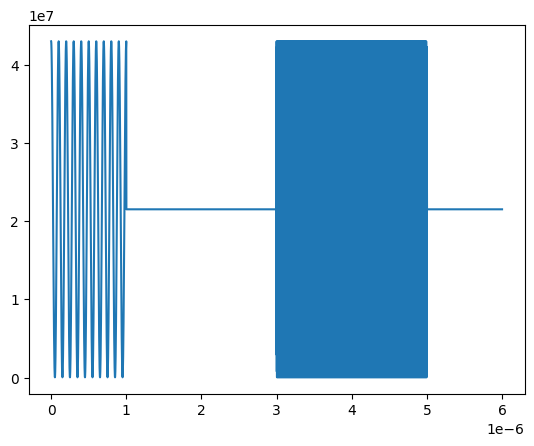

In [38]:
plt.plot (t_seq,dig_y)

In [ ]:
# Download segments
ichan = 0
channb = ichan + 1
segnum = ichan % 2 + 1
wav = dig_y
seglen = len(wav)
print('Download wave to segment {0} of channel {1}'.format(segnum, channb))

# Select channel
cmd = ':INST:CHAN {0}'.format(channb)
inst.send_scpi_cmd(cmd)

# Define segment
cmd = ':TRAC:DEF {0}, {1}'.format(segnum, seglen)
inst.send_scpi_cmd(cmd)

# Select the segment
cmd = ':TRAC:SEL {0}'.format(segnum)
inst.send_scpi_cmd(cmd)
    
# Send the binary-data:
inst.write_binary_data(':TRAC:DATA', wav)
    
resp = inst.send_scpi_query(':SYST:ERR?')
resp = resp.rstrip()
if not resp.startswith('0'):
    print('ERROR: "{0}" after writing binary values'.format(resp))

# Play the specified segment at the selected channel:
cmd = ':SOUR:FUNC:MODE:SEGM {0}'.format(segnum)
inst.send_scpi_cmd(cmd)

# Turn on the output of the selected channel:
inst.send_scpi_cmd(':OUTP ON')

resp = inst.send_scpi_query(':SYST:ERR?')
print(resp)

print()

resp = inst.send_scpi_query(':SYST:ERR?')
print(resp)

del wav